Q) PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

month: month of the year: 'jan' to 'dec'

day: day of the week: 'mon' to 'sun'

FFMC: FFMC index from the FWI system: 18.7 to 96.20

DMC: DMC index from the FWI system: 1.1 to 291.3

DC: DC index from the FWI system: 7.9 to 860.6

ISI: ISI index from the FWI system: 0.0 to 56.10

temp: temperature in Celsius degrees: 2.2 to 33.30

RH: relative humidity in %: 15.0 to 100

wind: wind speed in km/h: 0.40 to 9.40

rain: outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie: the burned area of the forest ( Small , Large)

Dataset: forestfires.csv

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Load Dataset

df= pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
# Data Exploration

In [3]:
df.shape

(517, 31)

In [4]:
# To check Missing values

df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
# Descriptive Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [9]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
pd.set_option("display.max_columns", 31)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [13]:
# Type of Variables

# Numerical Variables
# List of Numerical Variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables: 28


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [14]:
# List of categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [ ]:
# Data Visualisation

In [15]:
#Target variable
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})


,size_category,counts
0,small,378
1,large,139


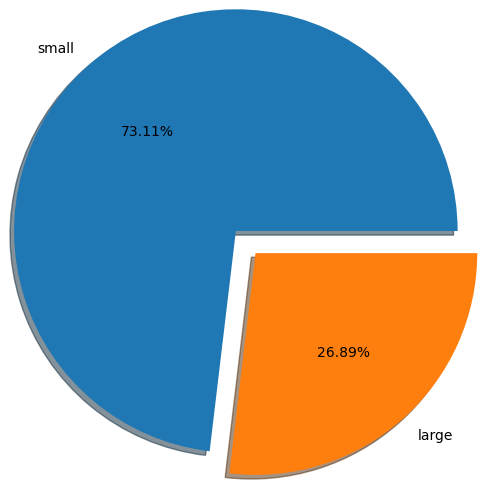

In [16]:
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5)
y_count
     

In [17]:
#Other features with target variable
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


Text(0.5, 1.02, 'Num of fires in each month')

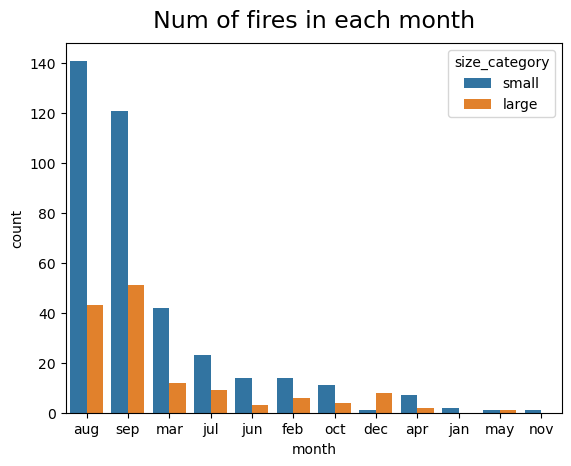

In [18]:
sns.barplot(x='month', y = 'count', hue='size_category', data=month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)

Note: From above observations we can say, Aug month has seen highest number of small fires. Whereas sep month has seen highest num of large fires. and Least num of fires occured in month of nov.

In [19]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


Text(0.5, 1.02, 'Num of fires in each day')

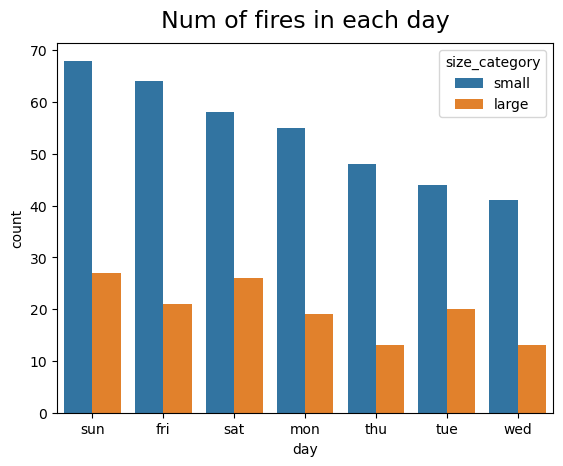

In [21]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_df)
plt.title("Num of fires in each day", fontsize=17, y=1.02)

Note: From above observations we can say, sunday has seen highest number of small fires and large fires too. Whereas wednesday has seen least num of small fires. and Least num of fires occured in thu and wed for large fires.

In [22]:
#Label Encoder

labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category']                                                 #1 for small, 0 for large

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [23]:
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


Text(0.5, 1.02, 'Rainfall level in diff category of forest')

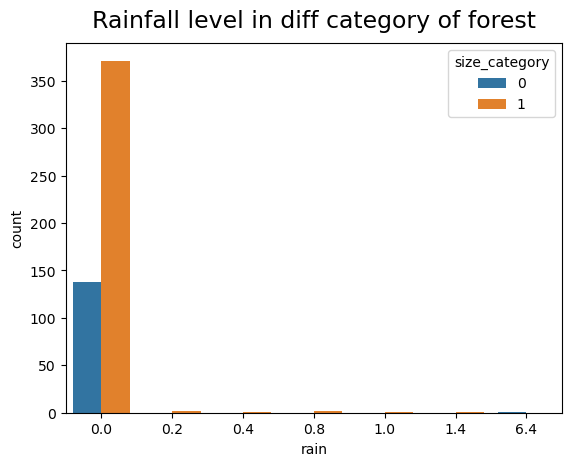

In [24]:
sns.barplot(x='rain', y='count', hue='size_category', data=rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)

Observation:

1) 0 represents large forest fire, 1 represents small forest fire.
2) Majority of the forests have almost no rainfall.
3) Highest rainfall a forest has was of 6.4 and it comes under a large forest fire catogory.

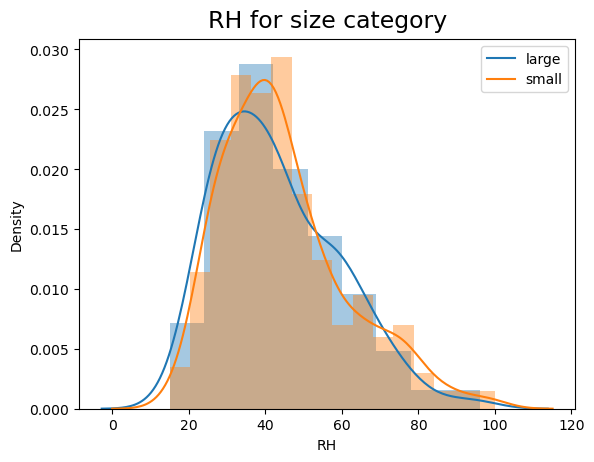

In [25]:
# Relative Humidity for size category 

sns.distplot(df[df['size_category']==0]['RH'])
sns.distplot(df[df['size_category']==1]['RH'])                 #orange for small fire, blue for large fire
plt.title("RH for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

Note: seems to be normally distributed. further Lets check its Outliers. 

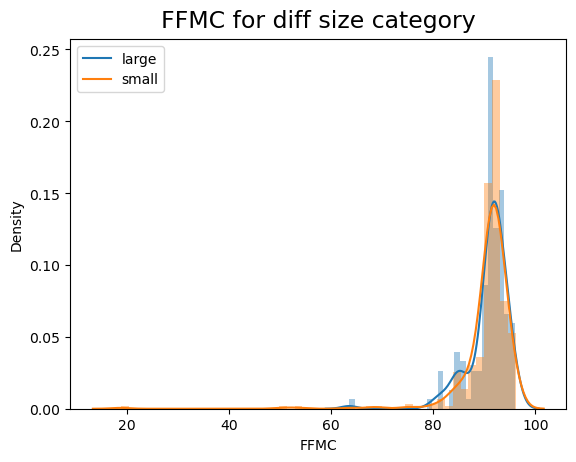

In [26]:
sns.distplot(df[df['size_category']==0]['FFMC'])
sns.distplot(df[df['size_category']==1]['FFMC'])                 #orange for small fire, blue for large fire
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

Note: Highly skewed and will have lot of outliers.

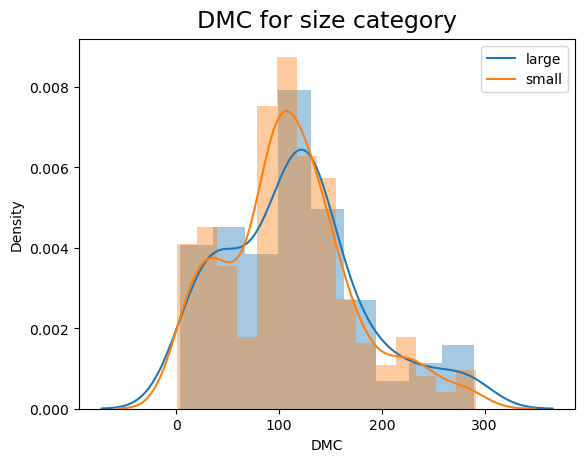

In [27]:
sns.distplot(df[df['size_category']==0]['DMC'])
sns.distplot(df[df['size_category']==1]['DMC'])                 #orange for small fire, blue for large fire
plt.title("DMC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

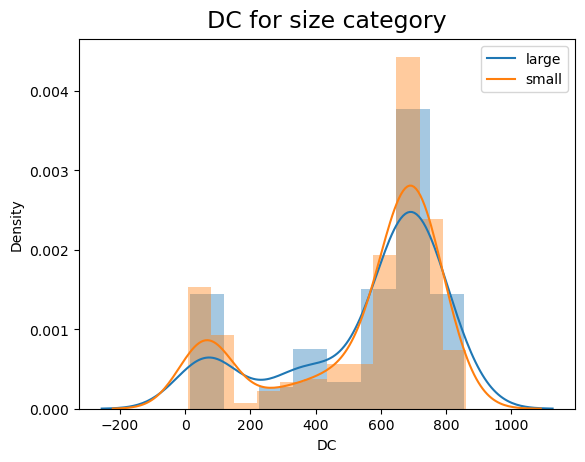

In [28]:
sns.distplot(df[df['size_category']==0]['DC'])
sns.distplot(df[df['size_category']==1]['DC'])                 #orange for small fire, blue for large fire
plt.title("DC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)
     

Note: Highly skewed and outliers are present.

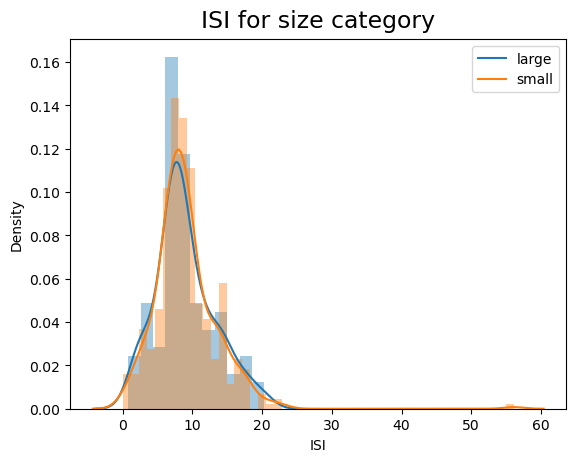

In [29]:
sns.distplot(df[df['size_category']==0]['ISI'])
sns.distplot(df[df['size_category']==1]['ISI'])                 #orange for small fire, blue for large fire
plt.title("ISI for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

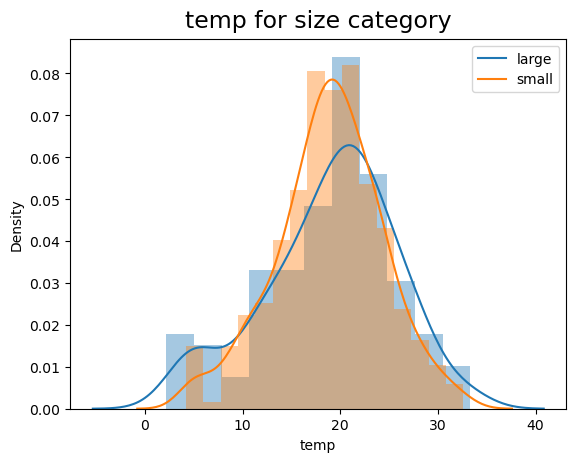

In [30]:
sns.distplot(df[df['size_category']==0]['temp'])
sns.distplot(df[df['size_category']==1]['temp'])                 #orange for small fire, blue for large fire
plt.title("temp for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

Note: seems to be normally distributed and Large forest fire has slighly higher temp than small forest fires.

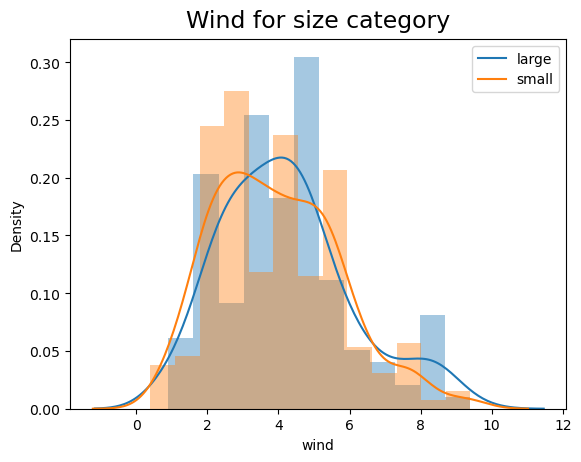

In [31]:
sns.distplot(df[df['size_category']==0]['wind'])
sns.distplot(df[df['size_category']==1]['wind'])                 #orange for small fire, blue for large fire
plt.title("Wind for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

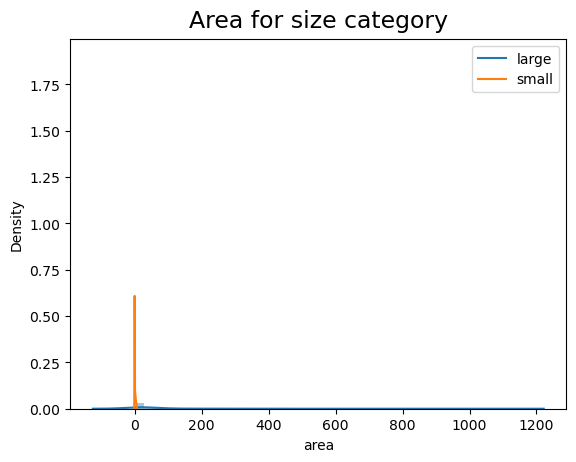

In [32]:
sns.distplot(df[df['size_category']==0]['area'])
sns.distplot(df[df['size_category']==1]['area'])                 #orange for small fire, blue for large fire
plt.title("Area for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)
     

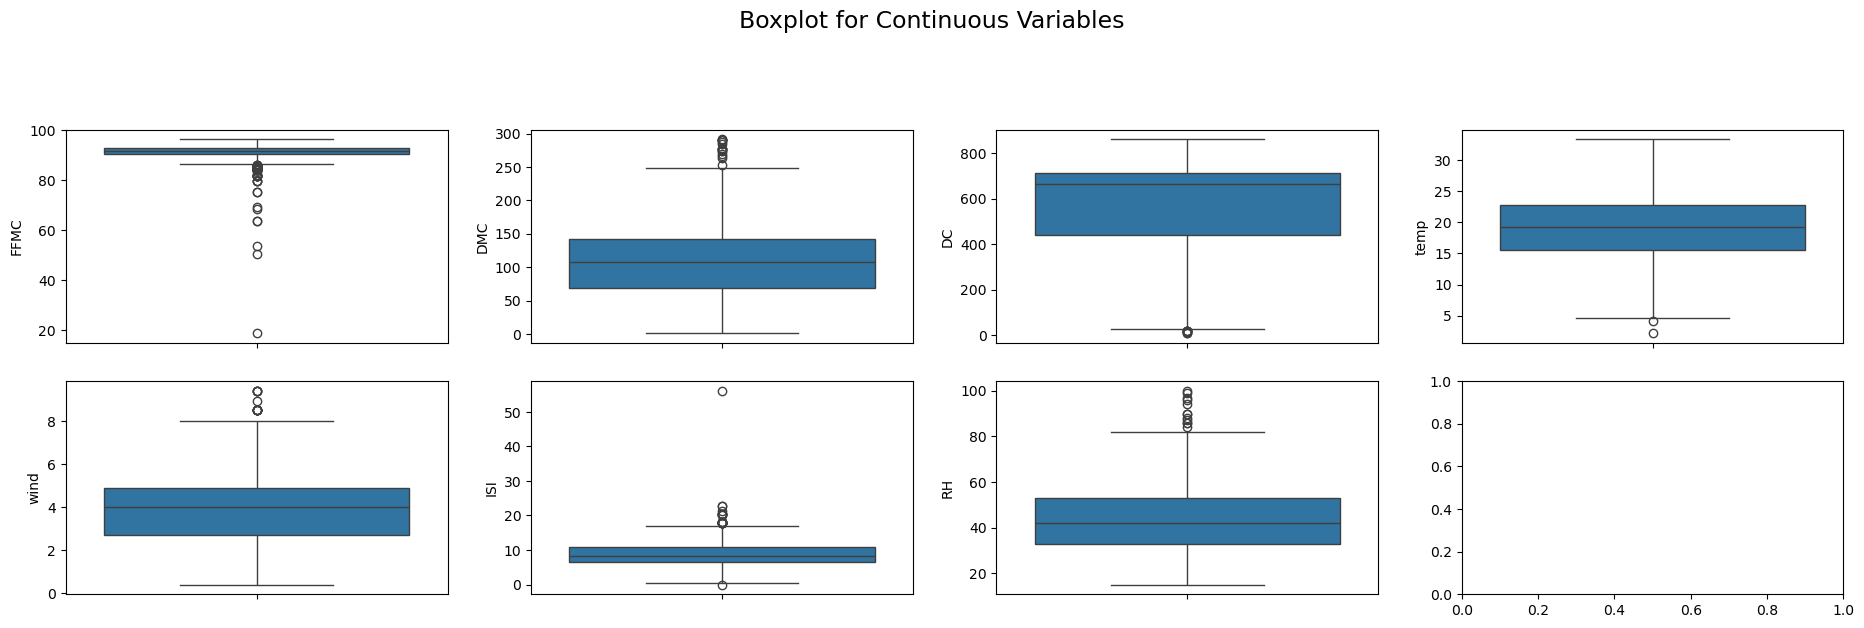

In [33]:
#check for outliers

fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)
     

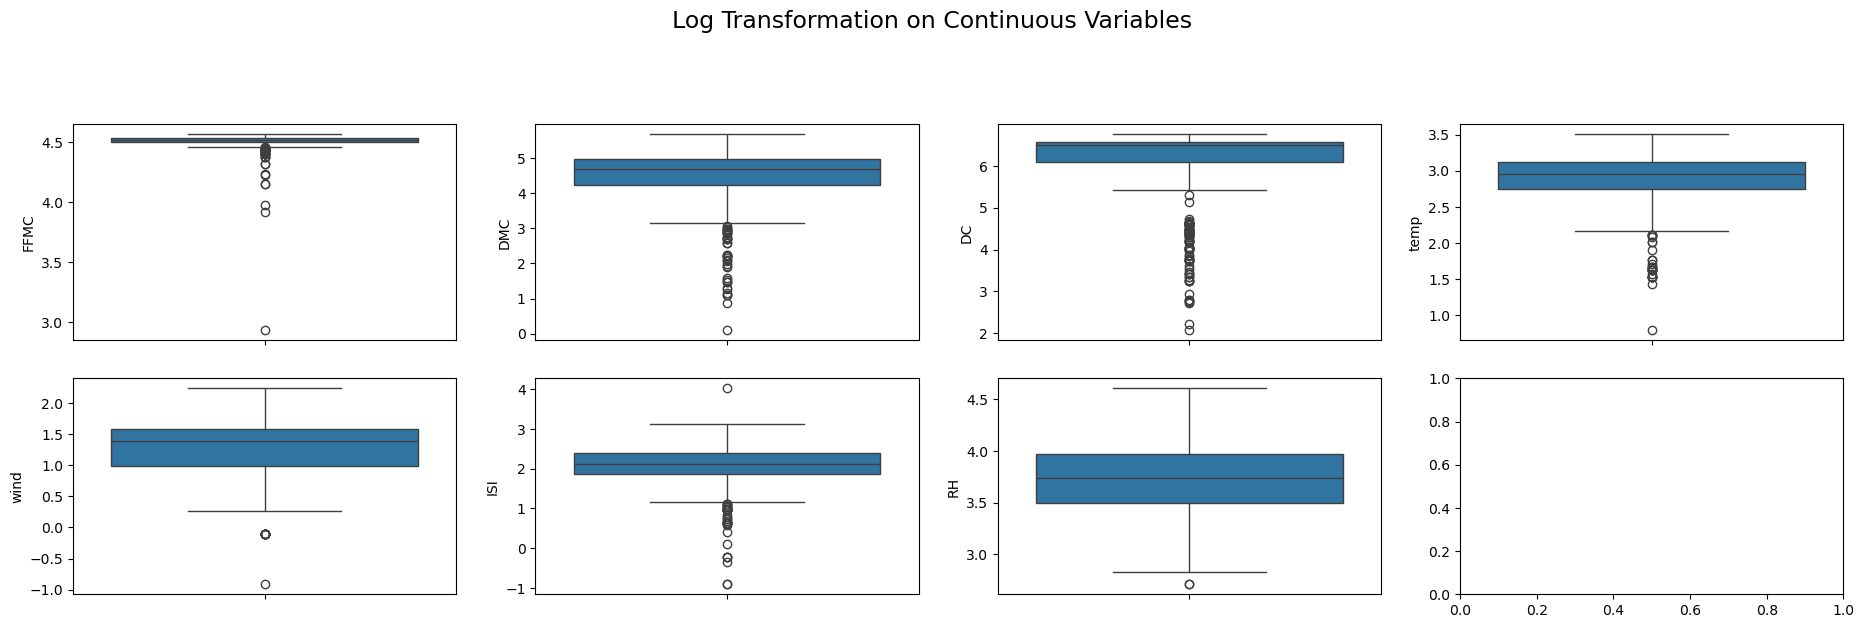

In [34]:
#Let ustry to treat our outliers by log tranformations

fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.FFMC), ax=ax[0,0])
sns.boxplot(np.log(df.DMC), ax=ax[0,1])
sns.boxplot(np.log(df.DC), ax=ax[0,2])
sns.boxplot(np.log(df.temp), ax=ax[0,3])
sns.boxplot(np.log(df.wind), ax=ax[1,0])
sns.boxplot(np.log(df.ISI), ax=ax[1,1])
sns.boxplot(np.log(df.RH), ax=ax[1,2])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)
     

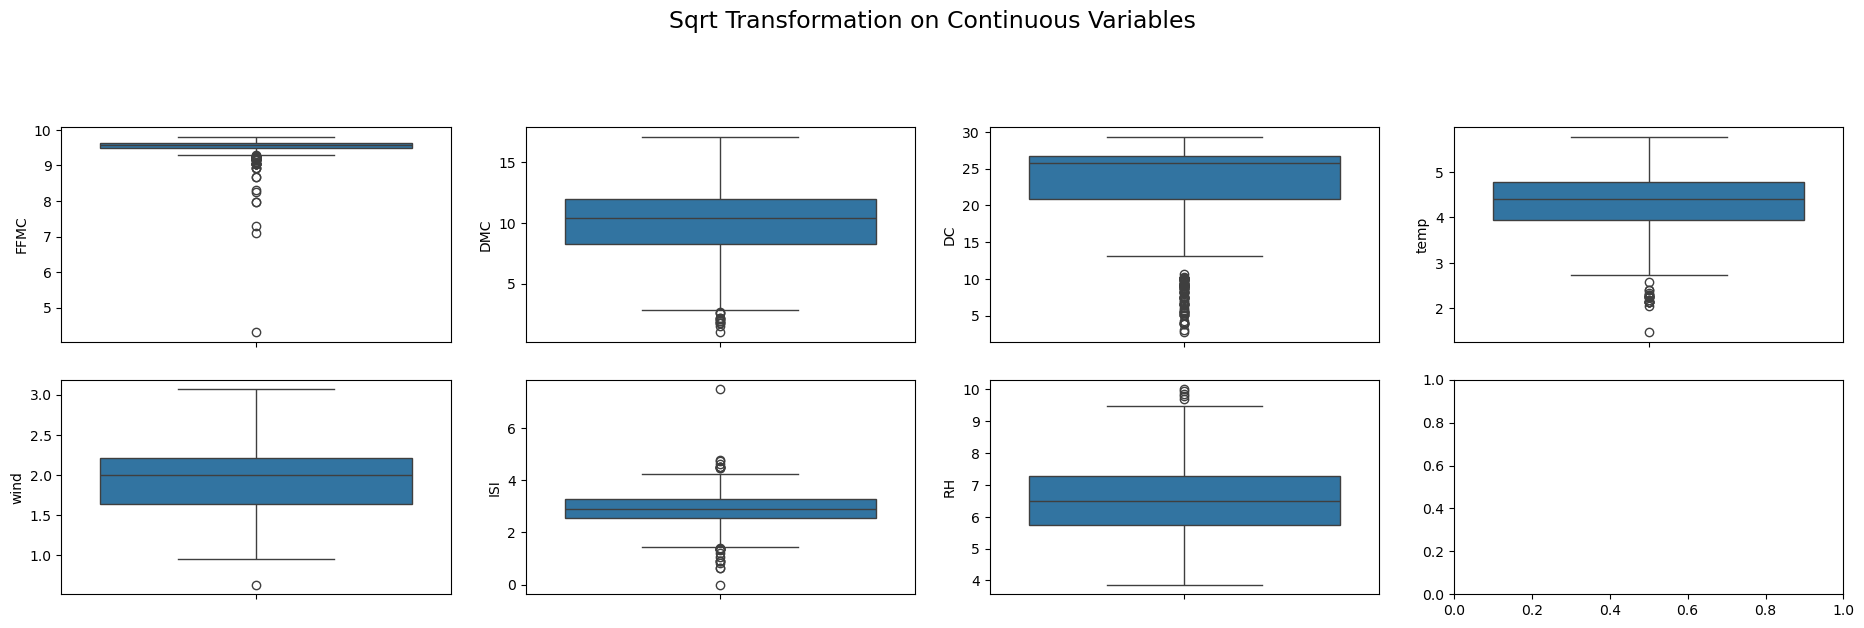

In [35]:
#Let ustry to treat our outliers by sqrt tranformations

fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.sqrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.sqrt(df.DC), ax=ax[0,2])
sns.boxplot(np.sqrt(df.temp), ax=ax[0,3])
sns.boxplot(np.sqrt(df.wind), ax=ax[1,0])
sns.boxplot(np.sqrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.sqrt(df.RH), ax=ax[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

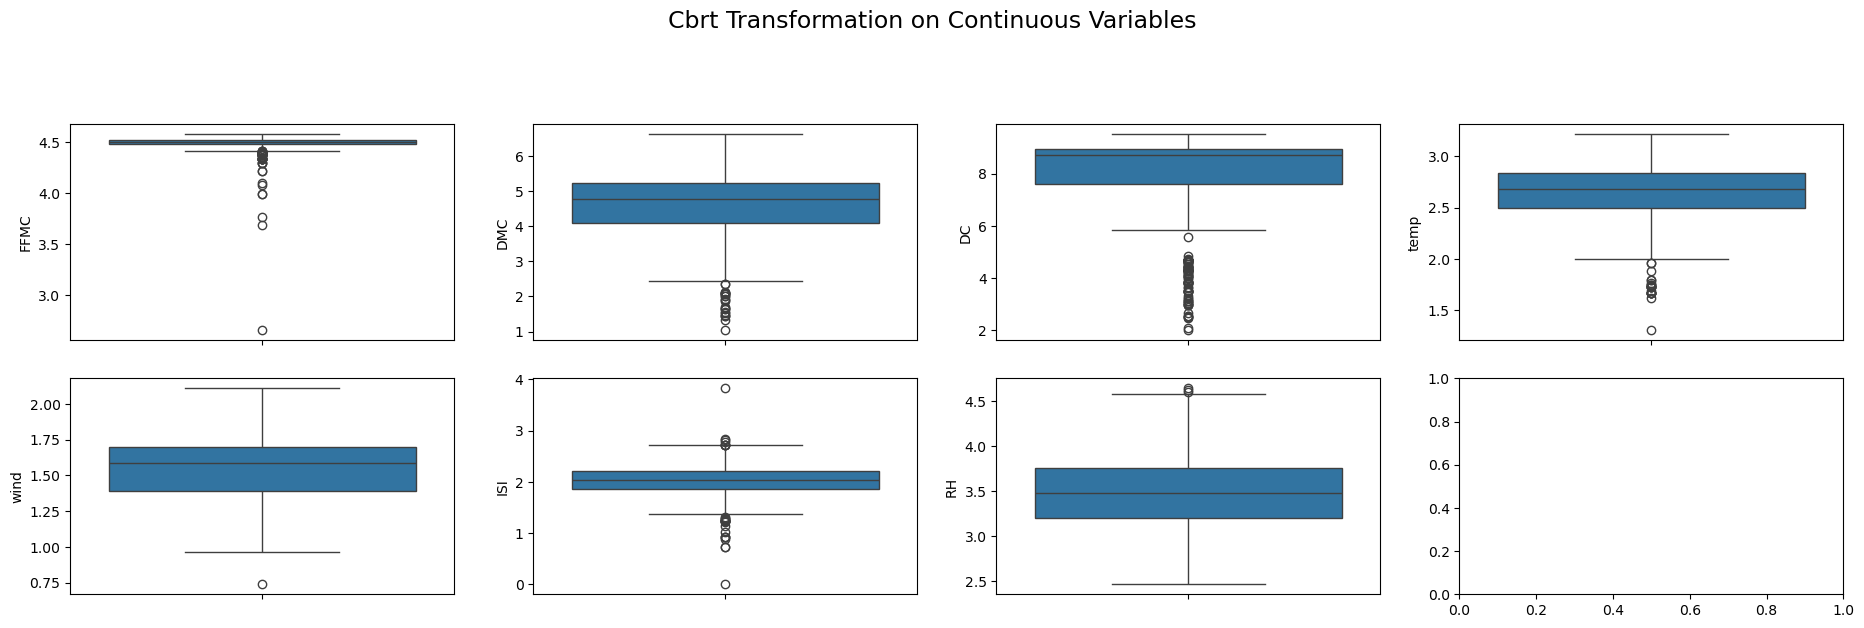

In [36]:
#Let ustry to treat our outliers by cube root tranformations

fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.cbrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.cbrt(df.DC), ax=ax[0,2])
sns.boxplot(np.cbrt(df.temp), ax=ax[0,3])
sns.boxplot(np.cbrt(df.wind), ax=ax[1,0])
sns.boxplot(np.cbrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.cbrt(df.RH), ax=ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

Note: None of them found helpful to treat outliers in any of the features.

In [ ]:
# Dependency of Target variable on diff Features

In [37]:
#to get correlation of target variable with numerical columns

df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [38]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

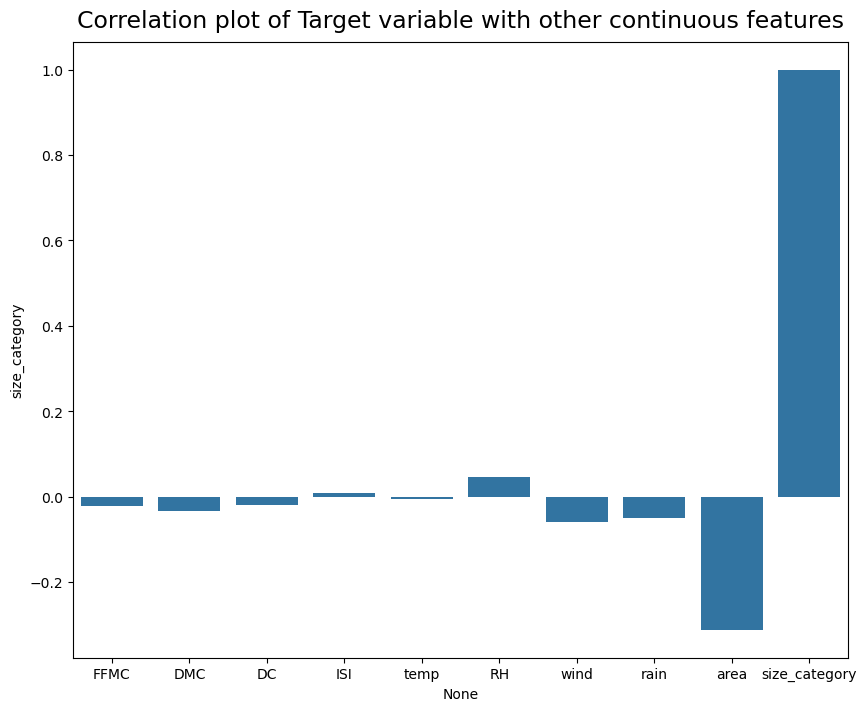

In [39]:
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

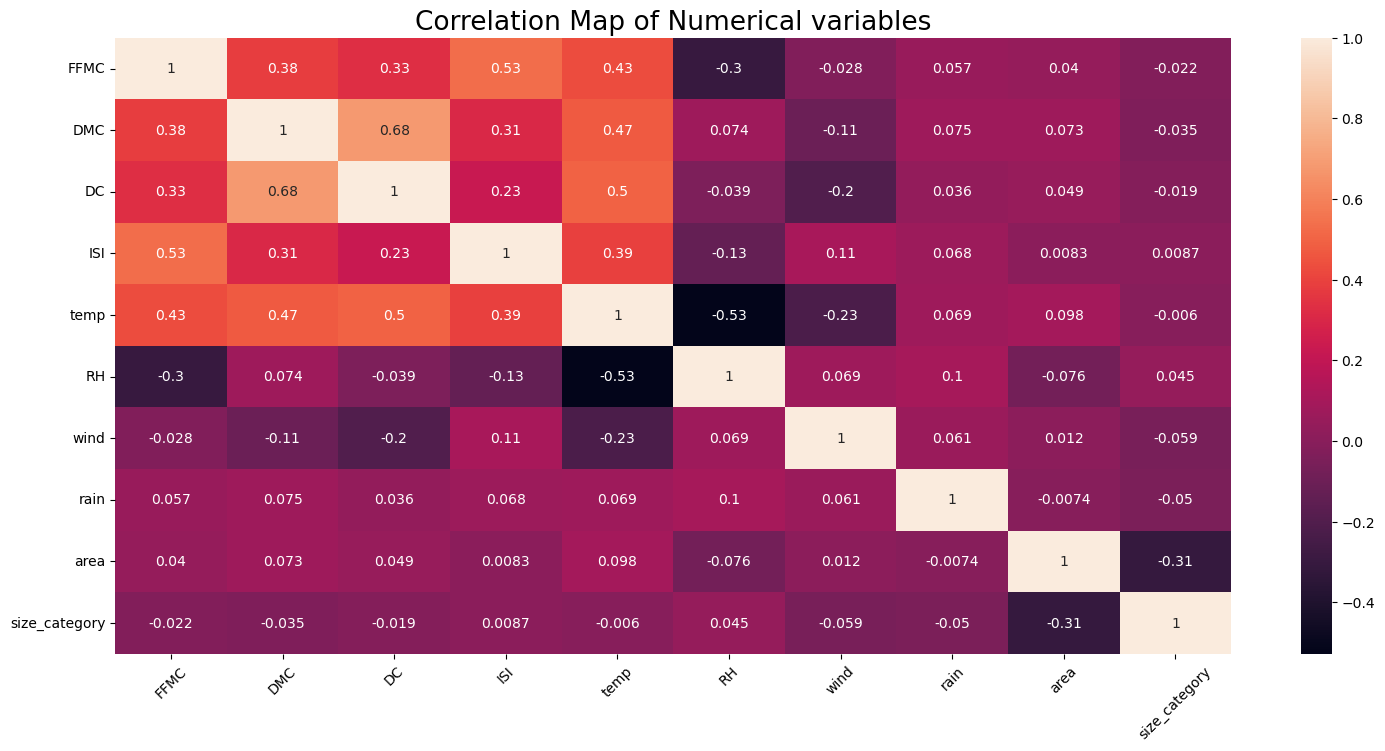

In [40]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19)

Text(0.5, 1.01, 'Pairplot for all numerical variables')

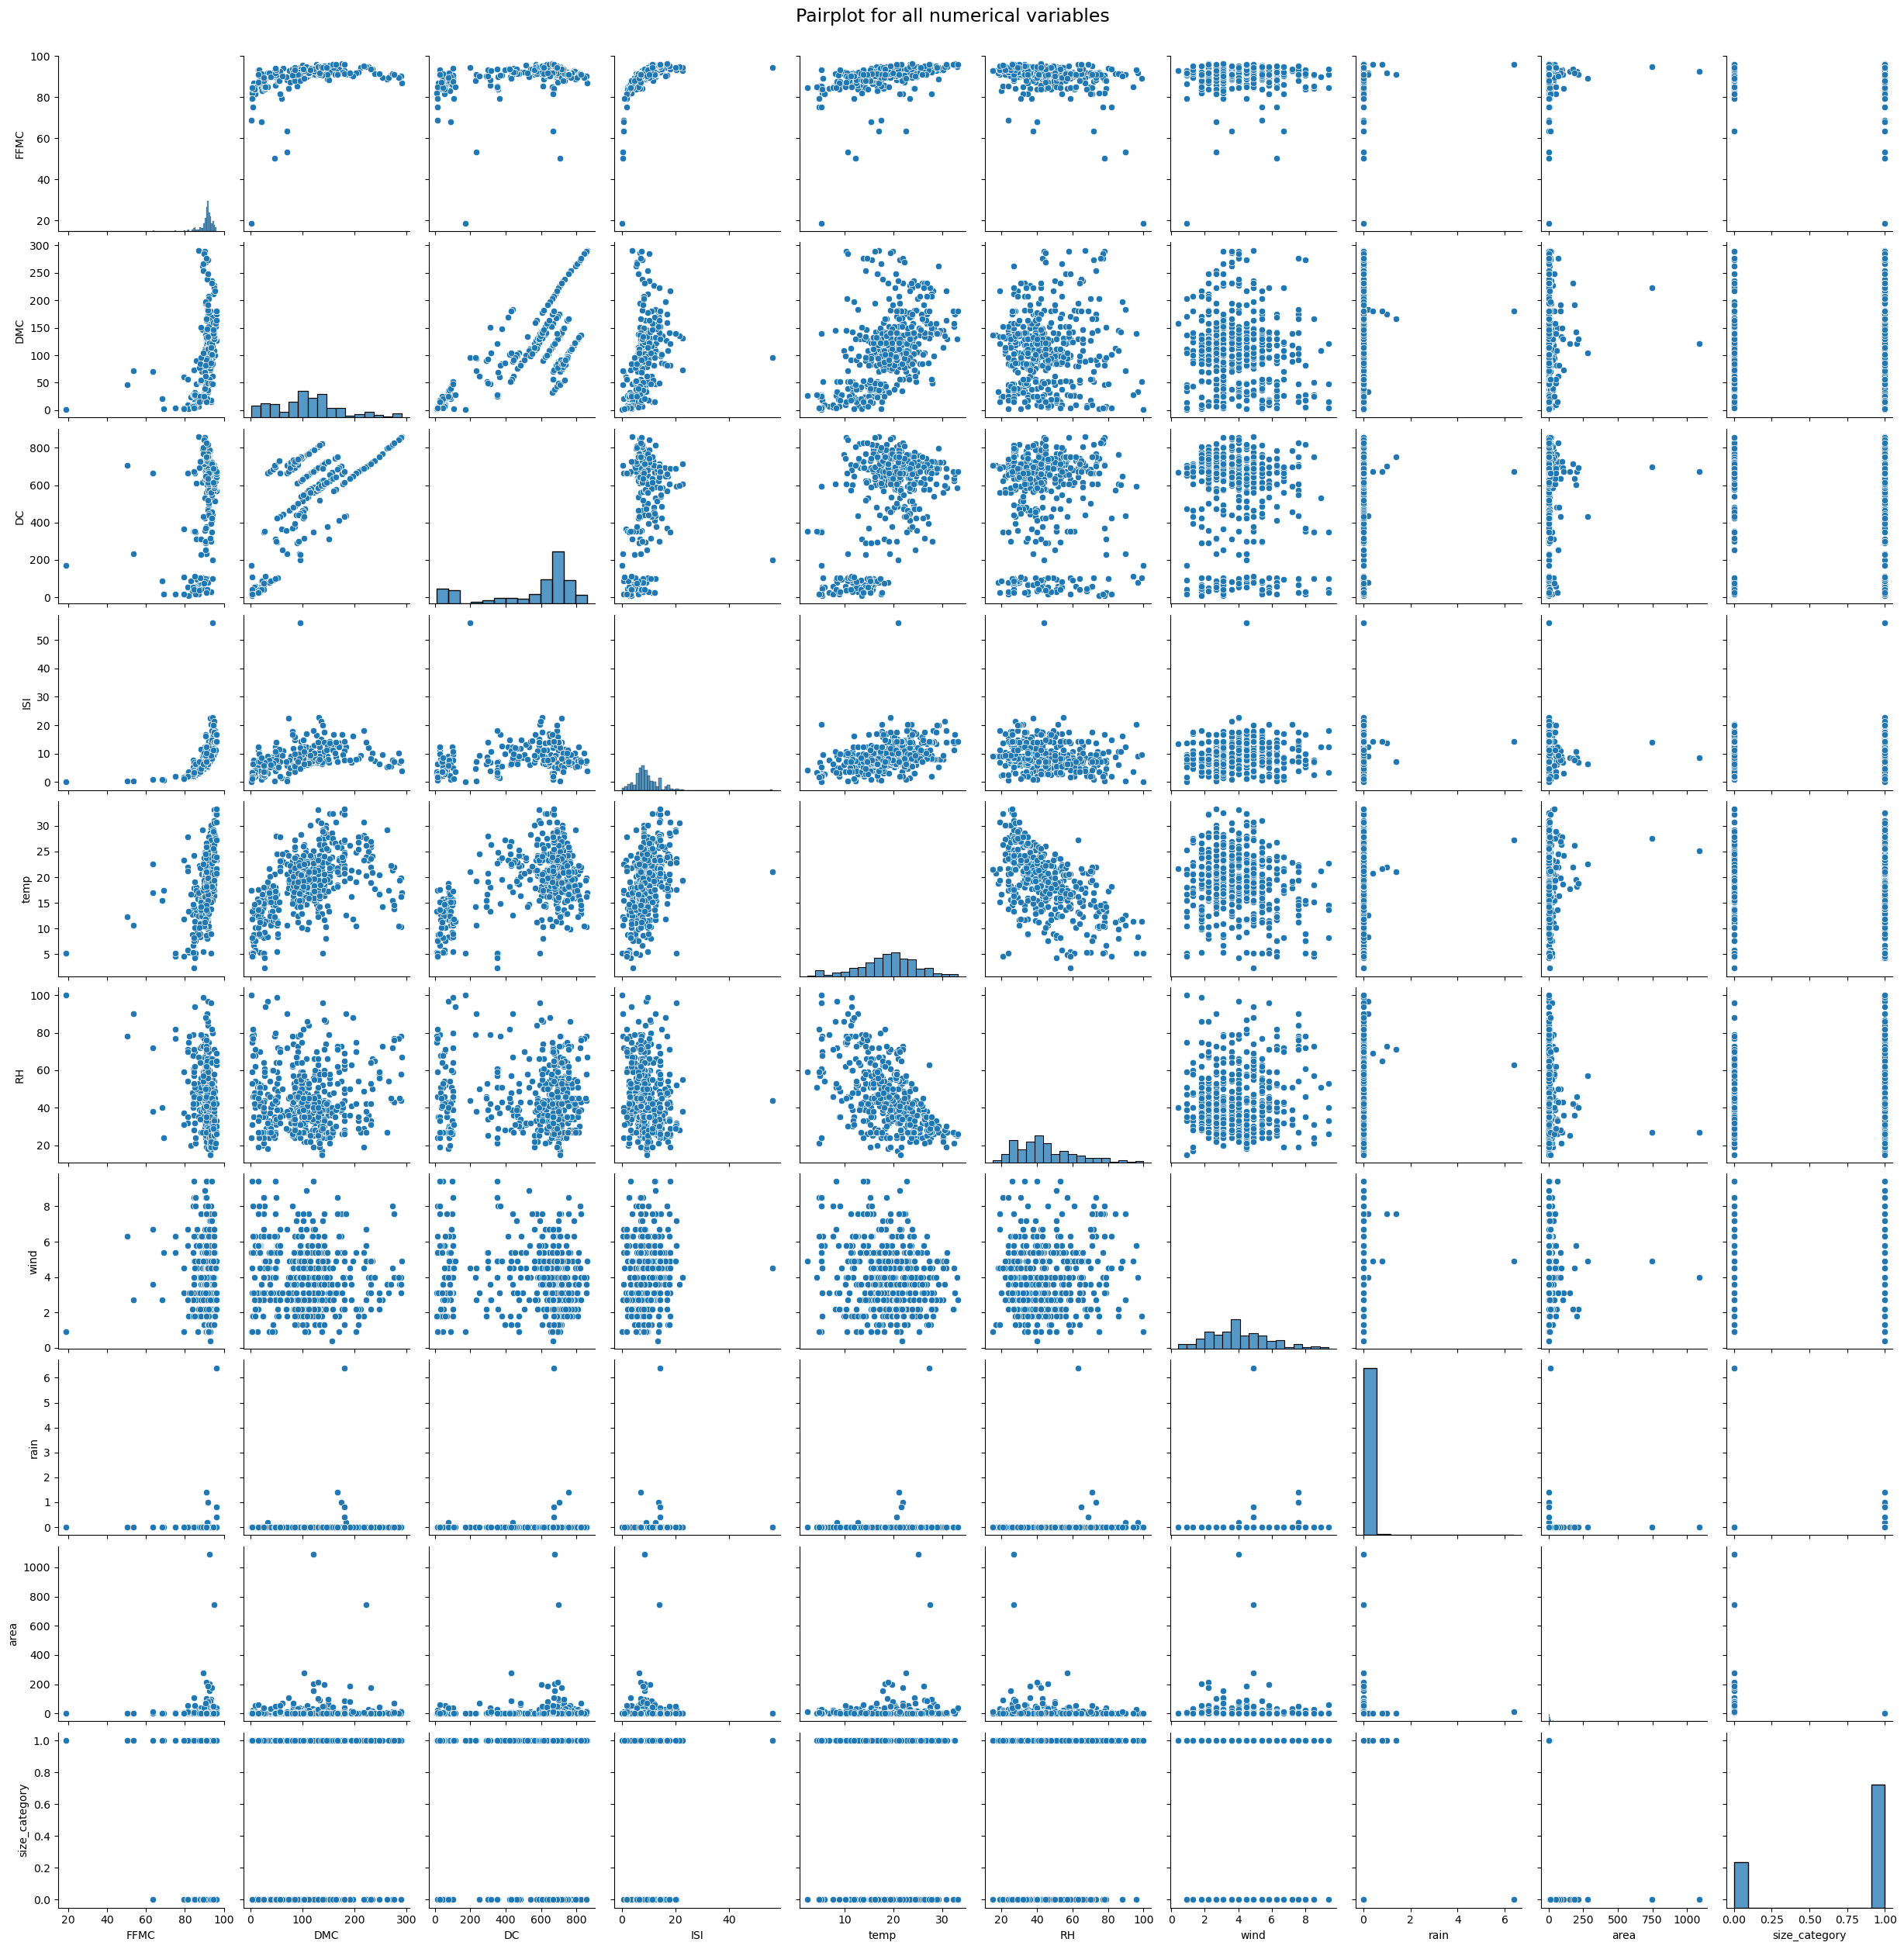

In [41]:
sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)

Note: We can get insights from last row of the plots for our prediction model.

In [ ]:
# Data Preprocessing

In [42]:
#drop the unnecessary columns
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)
     

In [43]:
pd.set_option("display.max_columns", 27)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [44]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]

In [45]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,-1


In [46]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [47]:

df.shape

(517, 27)

In [ ]:
# Splitting data into target variable and independent variables

In [48]:
x = df.drop('size_category', axis=1)
y = df['size_category']
     

In [ ]:
#Converting independent features into normalised and standardized data

In [49]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)            #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)            #data between -1 to +1
     

In [50]:
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081


In [ ]:
#Creating train and test data for model validation

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((387, 26), (130, 26), (387,), (130,))

In [ ]:
# To Build a Model

In [54]:
# Importing the necessary packages
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [55]:
from keras.layers import Dropout

# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=26, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [56]:
# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................



[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.910 total time=   7.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.859 total time=   2.6s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.870 total time=   2.7s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.883 total time=   2.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.844 total time=   2.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=5

[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.883 total time=   3.0s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.883 total time=   3.0s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.962 total time=   4.3s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................
[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.859 total time=   4.3s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.948 total time=   4.3s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.896 total time=   4.4s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_

In [57]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9173160173160173, using {'batch_size': 10, 'epochs': 100}
0.8733266733266731,0.02248021098609324 with: {'batch_size': 10, 'epochs': 10}
0.9121212121212121,0.02504162504162504 with: {'batch_size': 10, 'epochs': 50}
0.9173160173160173,0.03876610186309432 with: {'batch_size': 10, 'epochs': 100}
0.8526140526140527,0.02456346433602058 with: {'batch_size': 20, 'epochs': 10}
0.906959706959707,0.036763206600150776 with: {'batch_size': 20, 'epochs': 50}
0.9043623043623044,0.036221742899369226 with: {'batch_size': 20, 'epochs': 100}
0.7182484182484183,0.028532979585403163 with: {'batch_size': 40, 'epochs': 10}
0.893972693972694,0.027721632714129085 with: {'batch_size': 40, 'epochs': 50}
0.8965700965700967,0.053720849761675515 with: {'batch_size': 40, 'epochs': 100}


In [64]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

model.fit(x_train,y_train)

# Predicting using trained model

y_predict = model.predict(x_test)


# Printing the metrics

print("Test Accuracy:", accuracy_score(y_test,y_predict))

Test Accuracy: 0.9384615384615385


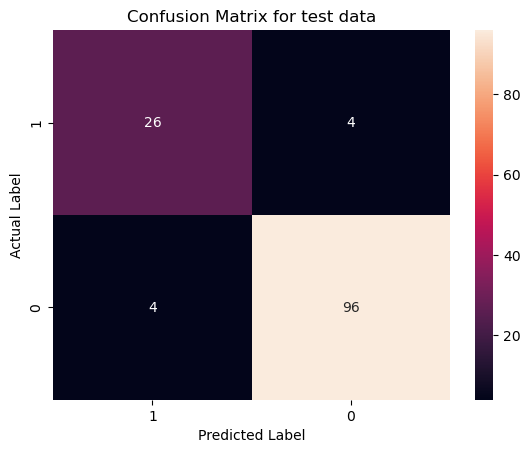

In [65]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_test, y_predict)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
     

In [66]:
y_hat = model.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, y_hat))

Train Accuracy: 0.9948320413436692


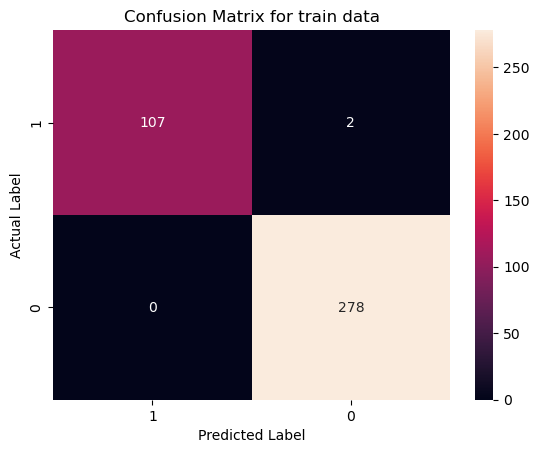

In [67]:
cm_df=confusion_matrix(y_train, y_hat)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()